In [1]:
%load_ext dotenv
%dotenv
from fastai.vision.all import *
from torch.utils.data import WeightedRandomSampler

# Set up DataLoader

In [2]:
from fastai.vision.all import *

path = Path("imgs/train/")
# Create the DataBlock without the additional images
dataloader = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, min_scale=0.75),
).dataloaders(path)


/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):
/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/torch/_tensor.py:1295: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  ret = func(*args, **kwargs)


In [3]:
[i for i in dataloader.train_ds.items if "best" in i.name]

[Path('imgs/train/pooping/1667_best.jpeg'),
 Path('imgs/train/pooping/1666_best.jpeg')]

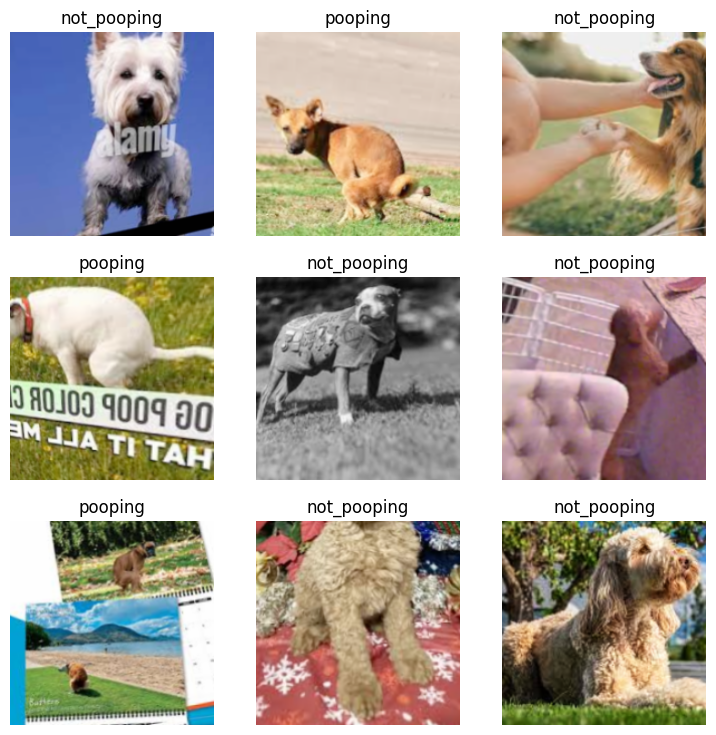

In [10]:
dataloader.show_batch()

# Train and export model

In [11]:
#Create learner, train and save model file
learn = vision_learner(dataloader, resnet34, metrics=accuracy)
learn.fine_tune(9)
learn.export("dog_be_pooping.pkl")

/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/julianbaumgartner/Dev/MrPloops/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Run predictions on test imgs

('pooping', tensor(1), tensor([3.1232e-09, 1.0000e+00]))


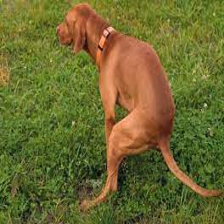

('not_pooping', tensor(0), tensor([0.7686, 0.2314]))


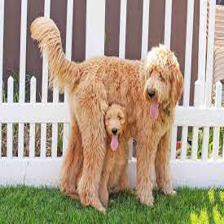

('pooping', tensor(1), tensor([1.7621e-06, 1.0000e+00]))


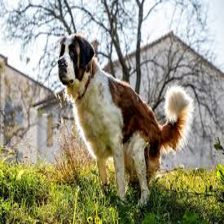

('pooping', tensor(1), tensor([3.8363e-17, 1.0000e+00]))


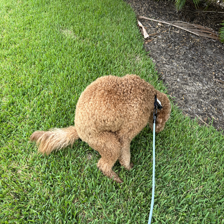

('not_pooping', tensor(0), tensor([9.9993e-01, 6.9989e-05]))


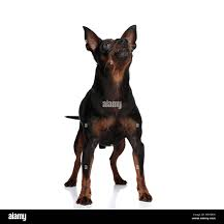

('not_pooping', tensor(0), tensor([0.9984, 0.0016]))


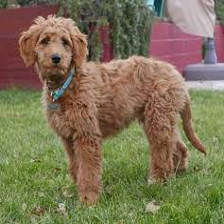

('pooping', tensor(1), tensor([4.3029e-15, 1.0000e+00]))


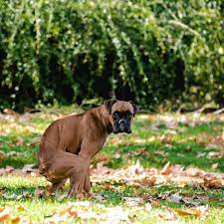

('pooping', tensor(1), tensor([4.2626e-14, 1.0000e+00]))


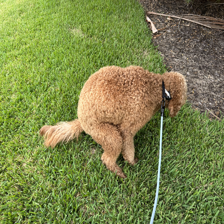

('pooping', tensor(1), tensor([0.0048, 0.9952]))


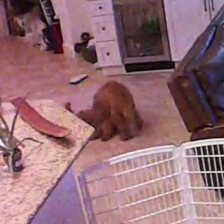

('pooping', tensor(1), tensor([5.2386e-08, 1.0000e+00]))


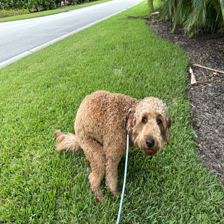

('pooping', tensor(1), tensor([3.2198e-14, 1.0000e+00]))


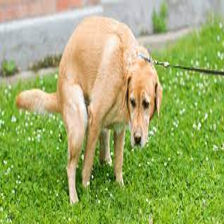

('pooping', tensor(1), tensor([6.6496e-08, 1.0000e+00]))


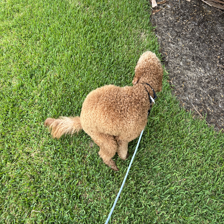

('pooping', tensor(1), tensor([7.5333e-04, 9.9925e-01]))


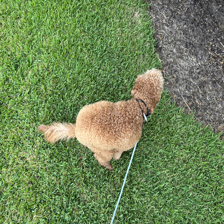

('pooping', tensor(1), tensor([5.2975e-17, 1.0000e+00]))


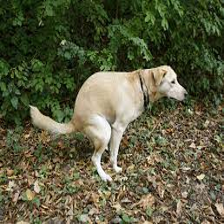

('not_pooping', tensor(0), tensor([0.9634, 0.0366]))


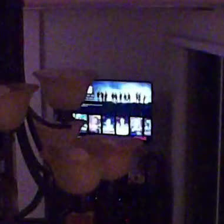

('not_pooping', tensor(0), tensor([0.9943, 0.0057]))


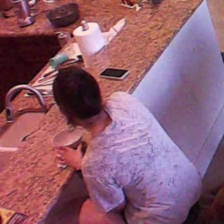

('not_pooping', tensor(0), tensor([0.9070, 0.0930]))


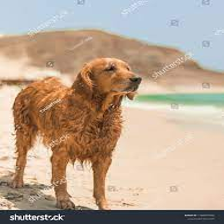

('pooping', tensor(1), tensor([2.6309e-11, 1.0000e+00]))


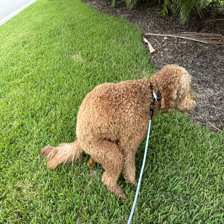

('not_pooping', tensor(0), tensor([9.9937e-01, 6.2897e-04]))


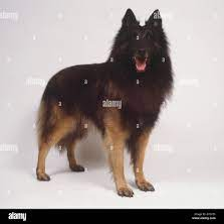

('pooping', tensor(1), tensor([7.5481e-13, 1.0000e+00]))


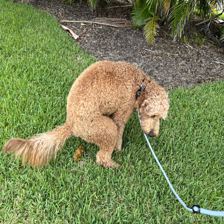

('pooping', tensor(1), tensor([3.5359e-12, 1.0000e+00]))


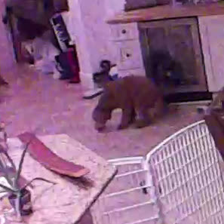

('pooping', tensor(1), tensor([8.0501e-10, 1.0000e+00]))


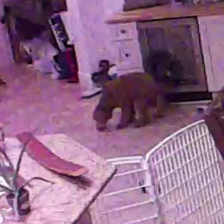

('not_pooping', tensor(0), tensor([0.9989, 0.0011]))


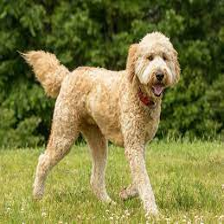

In [14]:
import PIL
import os
img_dir = "imgs/test"
for img in os.listdir(img_dir):
    if not img.endswith(".jpeg"):
        continue
    img = PIL.Image.open(os.path.join(img_dir, img))
    img = img.resize((224, 224))
    prediction = learn.predict(img)
    print(prediction)
    display(img)